# Image Classification Using Convolutional Neural Network (ANN) and (CNN)

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use ANN and CNN for classification

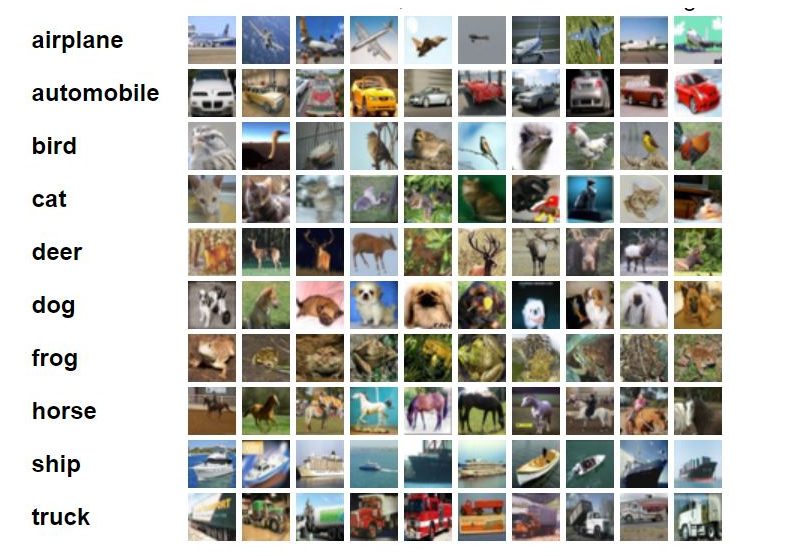

In [8]:
from IPython.display import Image

# Display an image
Image(filename='CIFAR-10.png')


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train),(X_test, y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
X_test.shape


(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

In [9]:
classes= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

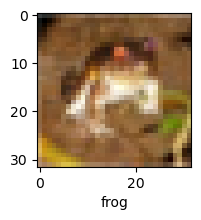

In [11]:
plot_sample(X_train, y_train,0)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
    ])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 139s 88ms/step - loss: 1.8119 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.6251 - accuracy: 0.4252
Epoch 3/5
1563/1563 [==============================] - 134s 85ms/step - loss: 1.5404 - accuracy: 0.4556
Epoch 4/5
1563/1563 [==============================] - 129s 83ms/step - loss: 1.4802 - accuracy: 0.4800
Epoch 5/5
1563/1563 [==============================] - 120s 77ms/step - loss: 1.4332 - accuracy: 0.4964


In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes= [np.argmax(element) for element in y_pred]

print('classification Report: \n',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 7s 21ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.42      0.49      1000
           1       0.74      0.48      0.58      1000
           2       0.28      0.44      0.34      1000
           3       0.35      0.14      0.20      1000
           4       0.41      0.42      0.41      1000
           5       0.25      0.66      0.37      1000
           6       0.59      0.31      0.40      1000
           7       0.58      0.45      0.51      1000
           8       0.68      0.55      0.61      1000
           9       0.57      0.56      0.57      1000

    accuracy                           0.44     10000
   macro avg       0.50      0.44      0.45     10000
weighted avg       0.50      0.44      0.45     10000



In [18]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 35s 22ms/step - loss: 1.5102 - accuracy: 0.4556
Epoch 2/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1468 - accuracy: 0.5977
Epoch 3/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0193 - accuracy: 0.6459
Epoch 4/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9354 - accuracy: 0.6765
Epoch 5/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8764 - accuracy: 0.6969
Epoch 6/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8252 - accuracy: 0.7152
Epoch 7/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7797 - accuracy: 0.7310
Epoch 8/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7454 - accuracy: 0.7410
Epoch 9/20
1563/1563 [==============================] - 2416s 2s/step - loss: 0.7013 - accuracy: 0.7594
Epoch 10/20
1563/1563 [==============================] - 41s 26m

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 9ms/step - loss: 1.1443 - accuracy: 0.6822


[1.1443333625793457, 0.682200014591217]

In [20]:
y_test=y_test.reshape(-1,)

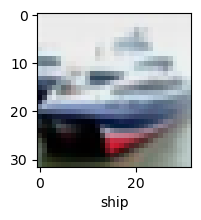

In [21]:
plot_sample(X_test, y_test, 1)

In [23]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 3s 10ms/step


In [24]:
y_pred[:5]

array([[2.4706062e-05, 6.8435271e-05, 3.1133507e-06, 9.8319823e-01,
        4.9220444e-07, 3.7653139e-04, 7.0477272e-03, 1.6247061e-08,
        9.2202527e-03, 6.0591105e-05],
       [1.5943056e-05, 9.8860008e-01, 5.6292467e-11, 1.4398308e-09,
        3.2332765e-11, 2.7292233e-14, 3.4247871e-10, 1.4351998e-13,
        1.1370103e-02, 1.3866239e-05],
       [2.3756154e-01, 6.4555877e-01, 6.7935898e-03, 5.2962550e-03,
        4.7249050e-04, 4.6375710e-05, 2.0808297e-05, 5.9509128e-03,
        8.7273195e-02, 1.1026029e-02],
       [9.3506163e-01, 5.0155457e-02, 2.4869985e-05, 1.3736941e-02,
        6.0392264e-05, 5.7054407e-08, 3.3080775e-07, 4.3193982e-06,
        8.1575254e-04, 1.4017124e-04],
       [1.8668169e-09, 5.6295058e-08, 2.0829236e-04, 1.8642126e-03,
        9.7537011e-01, 7.4791600e-04, 2.1808669e-02, 1.1008129e-07,
        5.2368807e-07, 1.3183389e-07]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 1, 1, 0, 4, 6, 9, 6, 3, 1]

In [28]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [29]:
print('classification Report: \n', classification_report(y_test, y_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.74      0.73      1000
           1       0.81      0.81      0.81      1000
           2       0.60      0.49      0.54      1000
           3       0.48      0.51      0.49      1000
           4       0.55      0.74      0.63      1000
           5       0.67      0.51      0.58      1000
           6       0.74      0.75      0.75      1000
           7       0.78      0.72      0.75      1000
           8       0.84      0.73      0.78      1000
           9       0.71      0.81      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

